## Calcul pour le potentiomètre

- Equation du potentiomètre linéaire
$$ R(\theta)=R_0 \cdot \frac{\theta }{\theta_{max}} $$
- Effet de charge
- Potentiomètre logarithmique

## Effet de charge

La mesure sur le curseur a une résistance R en parallèle. On définit $\rho$ comme étant la position relative du curseur. On a $0<=\rho<=1$.

In [2]:
import sympy as sp
sp.init_printing()
rho,R0,Rc, U0=sp.symbols('rho,R0,R_c,U_0')

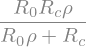

In [3]:
Req=R0*rho*Rc/(R0*rho+Rc)
Req

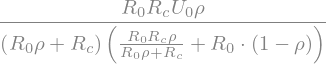

In [4]:
Uout=U0*Req/(R0*(1-rho)+Req)
Uout

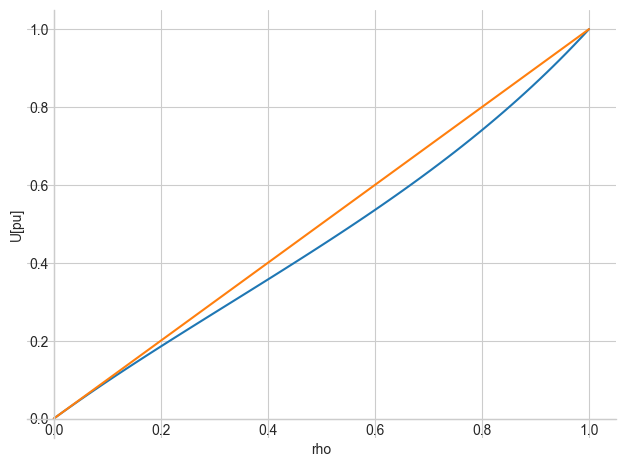

In [5]:
import matplotlib as plt
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')

valeurs={U0:1, R0:1000, Rc:2000}
fig=sp.plot(Uout.subs(valeurs), (U0*rho).subs(valeurs),(rho,0,1), xlabel="rho", ylabel="U[pu]")

## Potentiomètre logarithmique

Un élément de résistance est donné par
$$
dR(x)=rho_c*dx/(e(x)*h)
$$

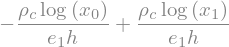

In [6]:
e0,e1,h,x,x0,x1, rho_c, x_max=sp.symbols('e_0,e_1,h,x,x0,x1,rho_c,x_max', positive=True)
e=x*e1
R=rho_c/(e*h)
Rx1=sp.integrate(R,(x,x0,x1))
Rx1

On a pour R(x1) une valeur
$$ R0 = \frac{\rho_c}{e_1 h}\log(\frac{x_1}{x_0}) $$

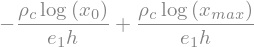

In [7]:
vR0=Rx1.subs(x1,x_max)
vR0

On a pour R0 une valeur qui est donnée par
$$ R0 = \frac{\rho_c}{e_1 h}\log(\frac{x_{max}}{x_0}) $$

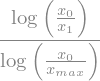

In [8]:
rUout=sp.simplify(Rx1/vR0)
rUout

La valeur de la tension de sortie suit une caractéristique logarithmique

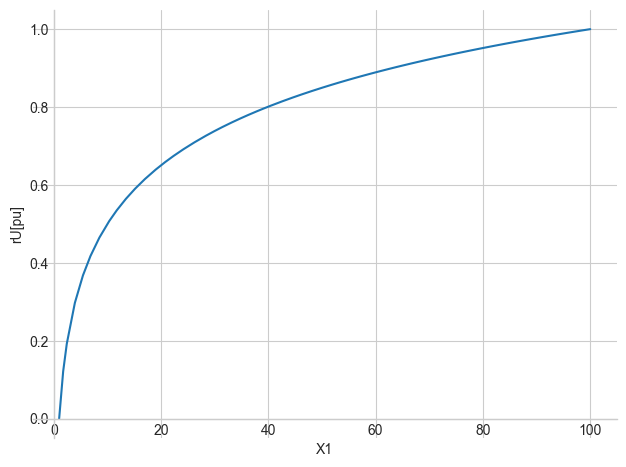

In [11]:
M=100
fig=sp.plot(rUout.subs({x0:1, x_max:M}),(x1,1,M), xmin=0, xmax=M, xlabel="X1", ylabel="rU[pu]")

Si on branche le potentiomètre dans l'autre sense, on peut inverser la caractéristique.

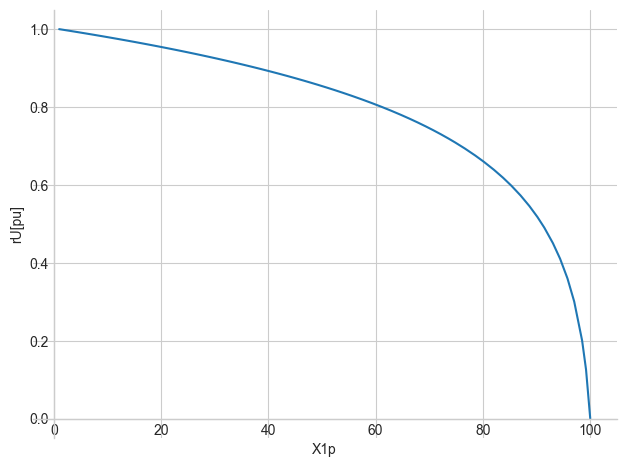

In [12]:
x1p=sp.symbols('x1p')
rUout2=rUout.subs(x1,x_max-x1p+x0)
fig=sp.plot(rUout2.subs({x0:1, x_max:M}),(x1p,1,M), xmin=0, xmax=M, xlabel="X1p", ylabel="rU[pu]")